# Inspect results of GLM-HMM model fit to unbiased blocks

This notebook examines the results of `scripts/fit_glm_hmm.py` run on the 
unbiased processed data in `data/processed/ashwood_unbiased`. The goal here is
just to reproduce the results from Ashwood et al., 2022, in order to make sure
our system is working.

In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import logit, expit

## Load results

In [2]:
result_fpaths = [f'../results/glm_hmm_unbiased/results_{i}.json' for i in range(1, 6)]

results = []
for fpath in result_fpaths:
    with open(fpath, 'r') as f:
        results.append(json.load(f))

## Plot log-likelihood as function of number of states

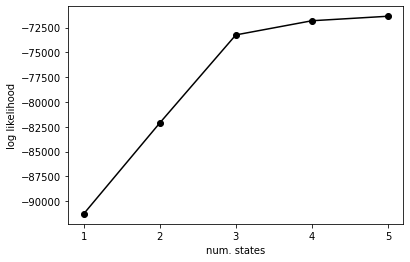

In [3]:
nstate_vals = np.array([r['n_states'] for r in results])
loglik_vals = np.array([r['fit_loglik'][-1] for r in results])

plt.plot(nstate_vals, loglik_vals, 'ko-')
plt.xticks(nstate_vals)
plt.xlabel('num. states')
plt.ylabel('log likelihood');

As they found in Ashwood et al., 2022, the increase in the log-likelihood value drops off after 3 states. This means that the 3-state model is probably the best fit. (At some point in the future, we could use a metric like AIC (Akaike Information Criterion) to make sure that this is in fact the case.) 

## Plot psychometric curves of all states

In [4]:
def compute_psych_curve(x_vals, bias, coef):
    return expit(bias + coef * x_vals)

def plot_psych_curves(params, x_min, x_max):

    x_vals = np.linspace(x_min, x_max, 1000)

    for k, v in params.items():
        y_vals = compute_psych_curve(x_vals, v['bias'], v['coef'])
        plt.plot(x_vals, y_vals, label=k)
        plt.xlabel('constrast (scaled)')
        plt.ylabel('p(left)')

    plt.legend()


### 1-state model

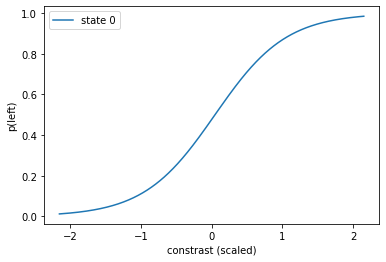

In [5]:
res = results[0]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)

### 2-state model

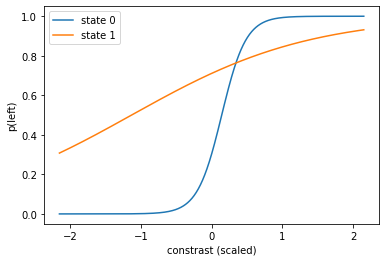

In [6]:
res = results[1]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)

### 3-state model

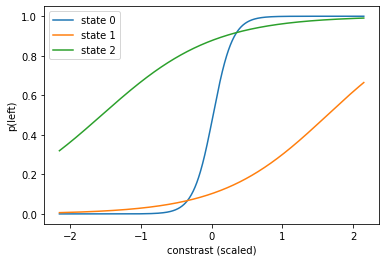

In [7]:
res = results[2]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)

### 4-state model

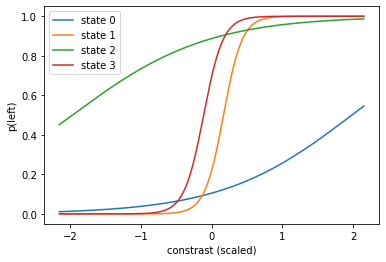

In [8]:
res = results[3]

params = res['params']
x_min = -res['scl_factor']
x_max = res['scl_factor']
plot_psych_curves(params, x_min, x_max)